This notebook contains software developed by Ultralytics LLC, and **is freely available for redistribution under the GPL-3.0 license**. For more information please visit https://github.com/ultralytics/yolov3 and https://www.ultralytics.com.


# Execute the segment as initialize:

In [1]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.3.0+cu100 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


# Run command to train YOLOv3 starting from yolov3 weight :

In [2]:
!horovodrun -np 6 -H localhost:6 python train.py --data data/voc.data --cfg cfg/yolov3-voc.cfg --weights /mnt/yolov3.weights --disttest
!echo 'Task done'

[1,3]<stdout>:Namespace(accumulate=2, adam=False, arc='default', batch_size=32, bucket='', cache_images=False, cfg='cfg/yolov3-voc.cfg', data='data/voc.data', device='', disttest=True, epochs=273, evolve=False, img_size=416, img_weights=False, multi_scale=False, name='', nosave=False, notest=False, prebias=False, rect=False, resume=False, transfer=False, var=None, weights='/mnt/yolov3.weights')
[1,5]<stdout>:Namespace(accumulate=2, adam=False, arc='default', batch_size=32, bucket='', cache_images=False, cfg='cfg/yolov3-voc.cfg', data='data/voc.data', device='', disttest=True, epochs=273, evolve=False, img_size=416, img_weights=False, multi_scale=False, name='', nosave=False, notest=False, prebias=False, rect=False, resume=False, transfer=False, var=None, weights='/mnt/yolov3.weights')
[1,1]<stdout>:Namespace(accumulate=2, adam=False, arc='default', batch_size=32, bucket='', cache_images=False, cfg='cfg/yolov3-voc.cfg', data='data/voc.data', device='', disttest=True, epochs=273, evolve=

# Run command to train YOLOv3 resume from lastest result:

In [10]:
!horovodrun -np 6 -H localhost:6 python train.py --data data/voc.data --cfg cfg/yolov3-voc.cfg --resume --disttest
!echo 'Task done'

[1,2]<stdout>:Namespace(accumulate=2, adam=False, arc='default', batch_size=32, bucket='', cache_images=False, cfg='cfg/yolov3-voc.cfg', data='data/voc.data', device='', disttest=True, epochs=273, evolve=False, img_size=416, img_weights=False, multi_scale=False, name='', nosave=False, notest=False, prebias=False, rect=False, resume=True, transfer=False, var=None, weights='weights/last.pt')
[1,3]<stdout>:Namespace(accumulate=2, adam=False, arc='default', batch_size=32, bucket='', cache_images=False, cfg='cfg/yolov3-voc.cfg', data='data/voc.data', device='', disttest=True, epochs=273, evolve=False, img_size=416, img_weights=False, multi_scale=False, name='', nosave=False, notest=False, prebias=False, rect=False, resume=True, transfer=False, var=None, weights='weights/last.pt')
[1,4]<stdout>:Namespace(accumulate=2, adam=False, arc='default', batch_size=32, bucket='', cache_images=False, cfg='cfg/yolov3-voc.cfg', data='data/voc.data', device='', disttest=True, epochs=273, evolve=False, img

# Run `detect.py` to perform inference on images in `data/samples` folder:

Namespace(cfg='cfg/yolov3-voc.cfg', conf_thres=0.3, data='data/voc.data', device='', fourcc='mp4v', half=False, img_size=416, nms_thres=0.5, output='output', source='data/samples', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)
           device1 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)
           device2 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)
           device3 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)
           device4 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)
           device5 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

image 1/2 data/samples/bus.jpg: 416x320 2 persons, Done. (0.047s)
image 2/2 data/samples/zidane.jpg: 256x416 1 persons, Done. (0.031s)
Results saved to /opt/yolov3/output
Done. (0.156s)


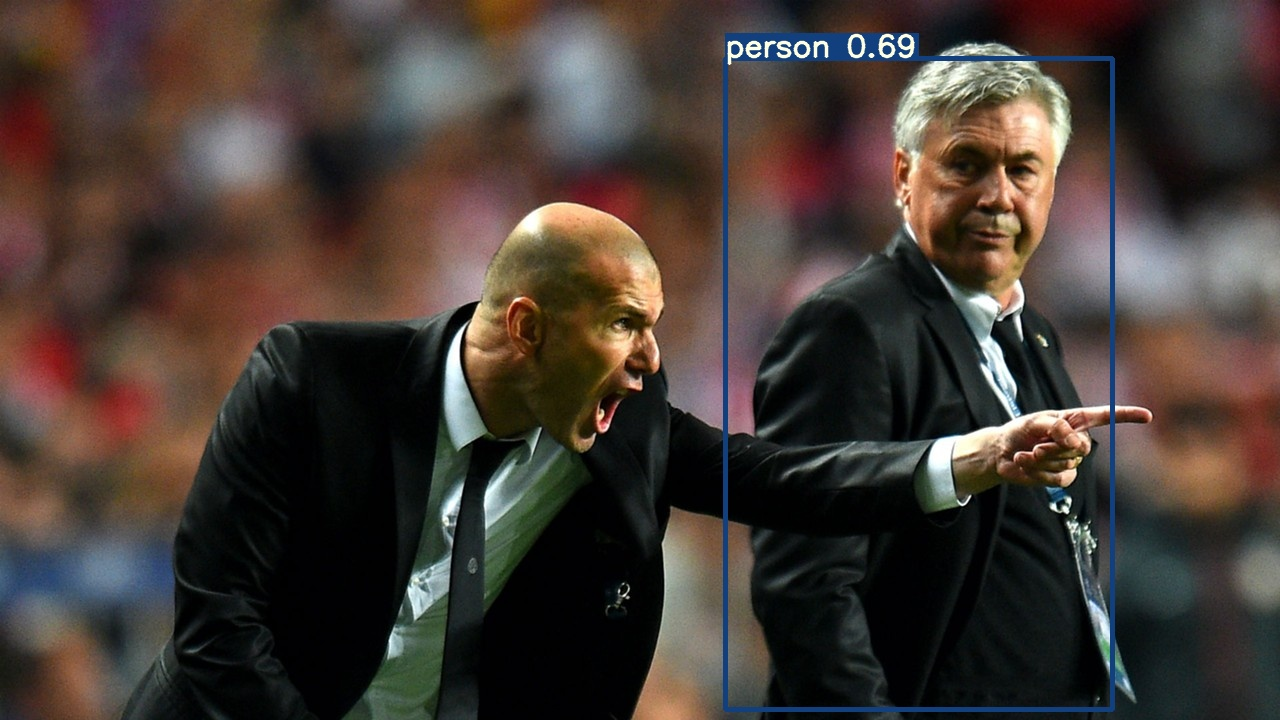

In [7]:
var_weights="weights/last.pt"
var_cfg="cfg/yolov3-voc.cfg"
var_data="data/voc.data"
!python3 detect.py --weights {var_weights} --cfg {var_cfg} --data {var_data}
Image(filename='output/zidane.jpg', width=600)

# Run `test.py` to evaluate the performance of a trained darknet or PyTorch model:

In [9]:
!python3 test.py --weights weights/last.pt --cfg cfg/yolov3-voc.cfg --data data/voc.data   

Namespace(batch_size=16, cfg='cfg/yolov3-voc.cfg', conf_thres=0.001, data='data/voc.data', device='', img_size=416, iou_thres=0.5, nms_thres=0.5, save_json=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)
           device1 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)
           device2 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)
           device3 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)
           device4 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)
           device5 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

               Class    Images   Targets         P         R       mAP        F1: 100%|#| 310/310 [03:32<00:00,  1.46it/s]
                 all  4.95e+03   1.2e+04    0.0431     0.848     0.579    0.0813
           aeroplane  4.95e+03       285    0.0405       0.8     0.603     0.077
             bicycle  4.95e+03       337    

# Reproduce tutorial training runs and plot training results:

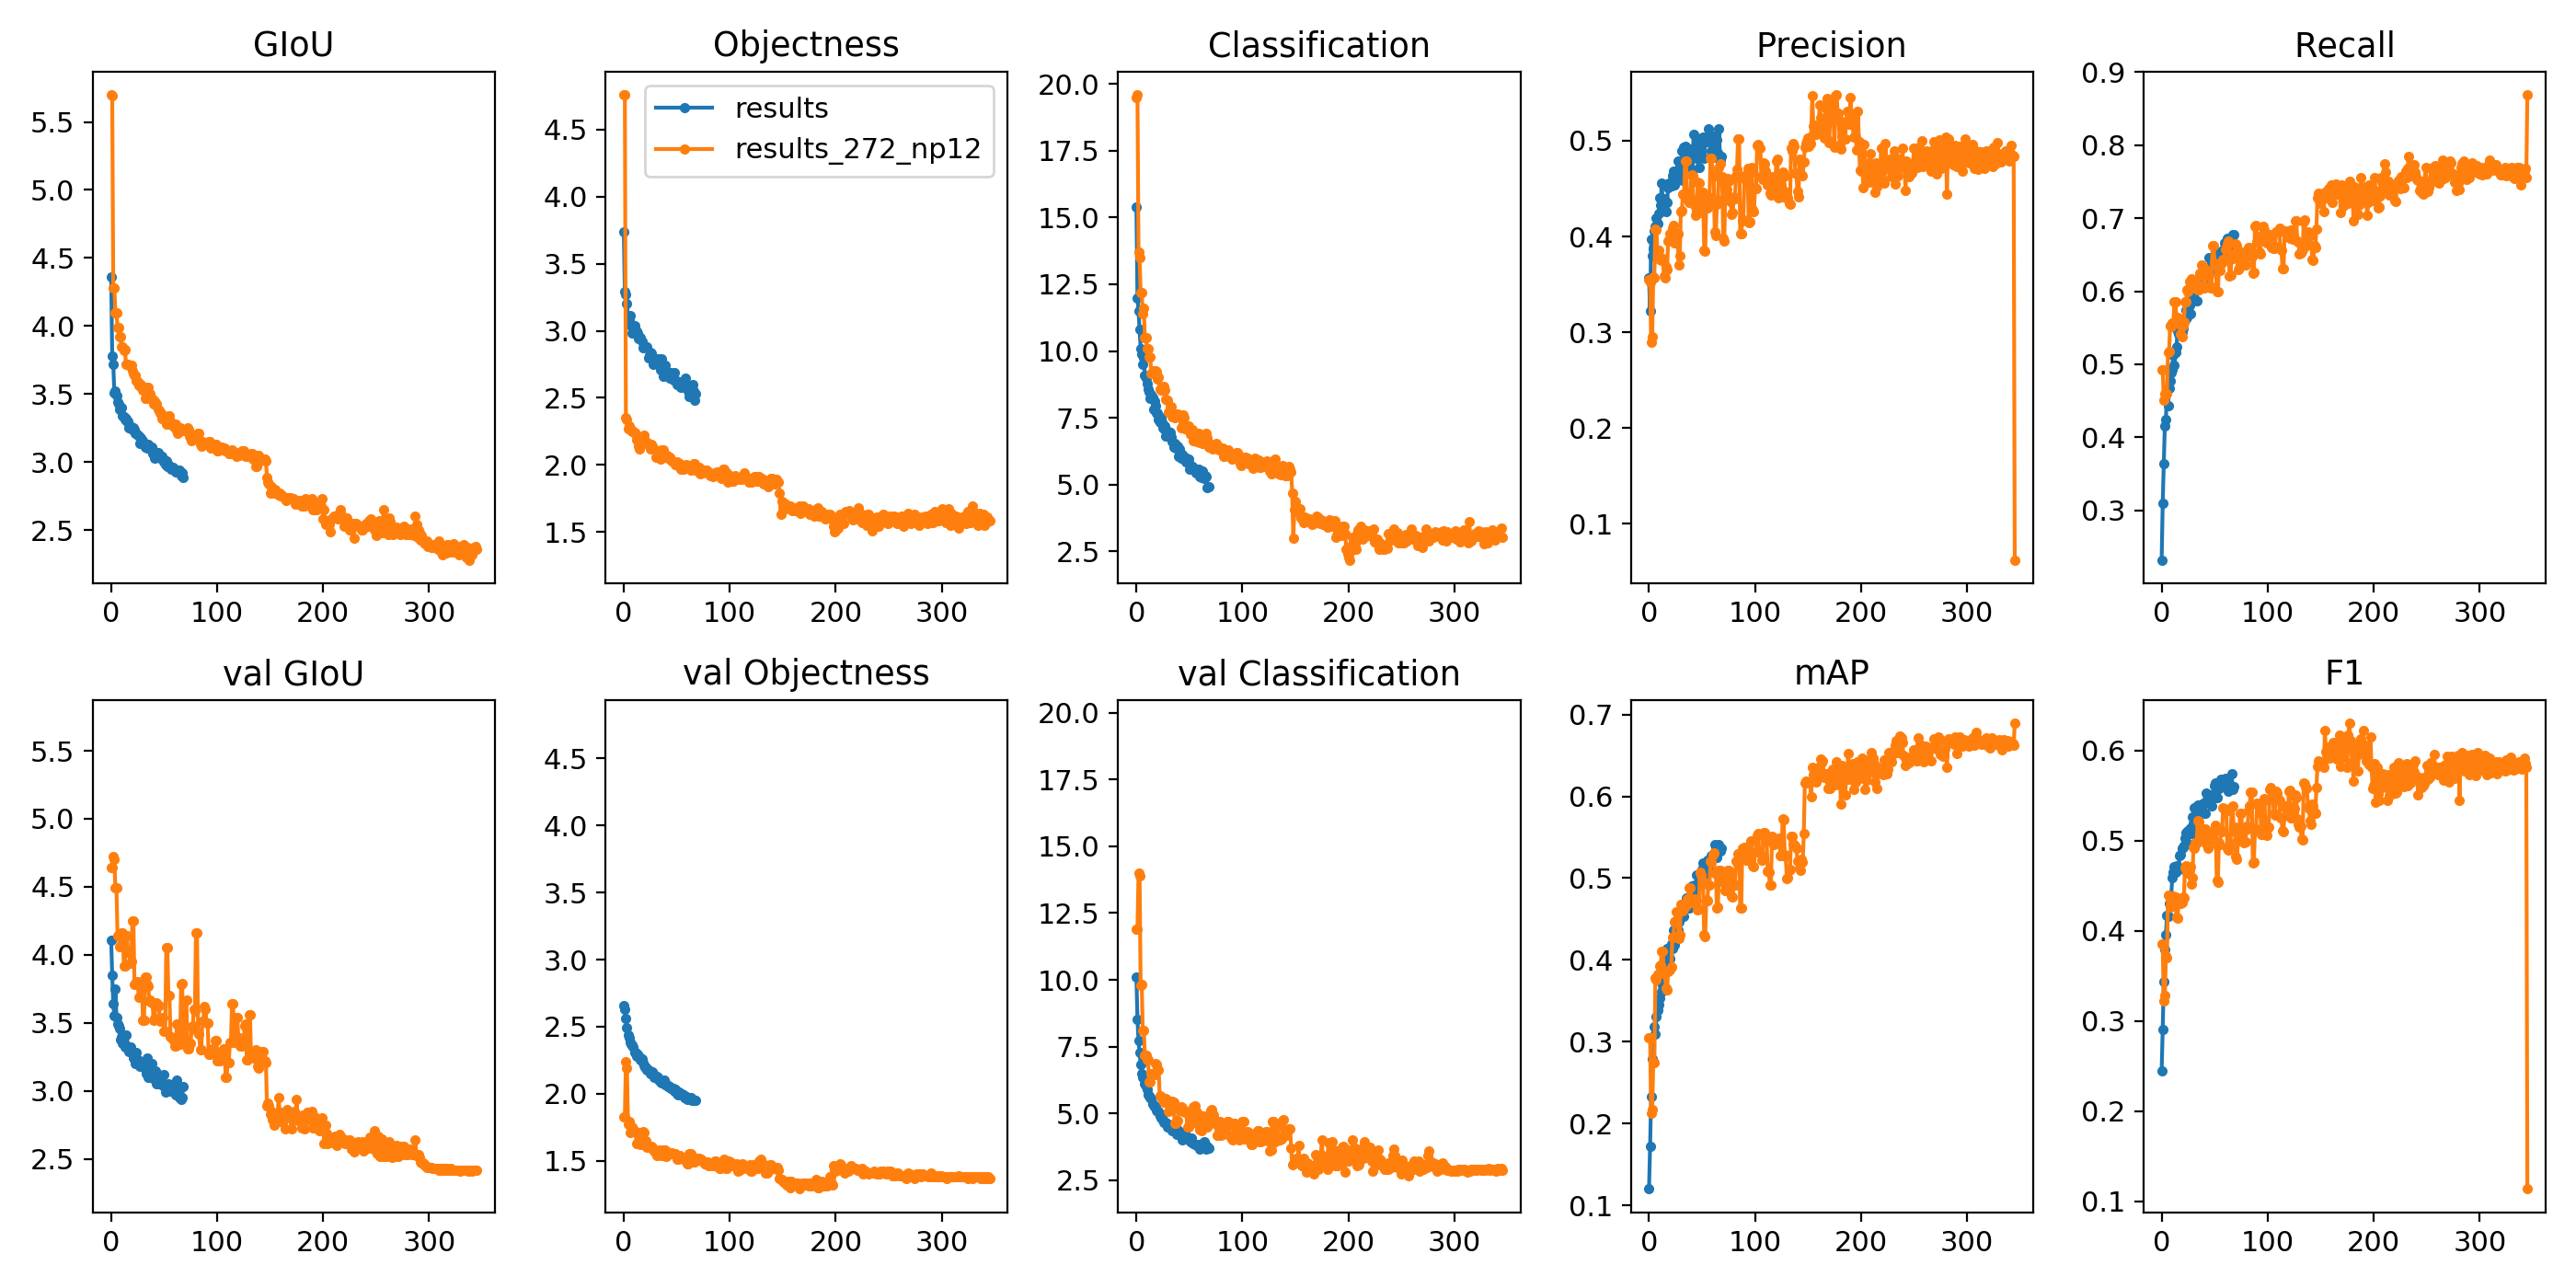

In [3]:
!python -c "from utils import utils; utils.plot_results()"  # plot training results, it will process all result*.txt file at current folder 
Image(filename='results.png', width=800)

# Pytorch\Darknet weights Conversion

In [3]:
# convert darknet cfg/weights to pytorch model
!python -c "from models import *; convert('cfg/yolov3.cfg', '/mnt/yolov3.weights')"

Success: converted '/mnt/yolov3.weights' to 'converted.pt'


In [4]:
# convert cfg/pytorch model to darknet weights
!python -c "from models import *; convert('cfg/yolov3-voc.cfg', 'weights/best.pt')"

Success: converted 'weights/best.pt' to 'converted.weights'
